### Problem Type - Regression problem 
### Goal :  <span Style = "color:Green">  To build a data science model that explains how key factors influence U.S. Home Price Index over the last 20 years using the S&P Case-Schiller Home Price Index.</span> 

####  Here are the mentioned Key factors involved in influencing of house prices in US also i have added sources for the scrapped data: 

<span Style = "color:Green">
    
Economic factors: </span>
https://fred.stlouisfed.org/
    
Interest rates (Federal Reserve Economic Data (FRED))  
Unemployment rate (FRED)   
Gross Domestic Product (GDP) (FRED)    
Consumer Price Index (CPI) (FRED)


<span Style = "color:Green">
    
Demographic factors:</span>
https://www.census.gov/
    
Population (U.S. Census Bureau)    
Median household income (U.S. Census Bureau)    
Age distribution (U.S. Census Bureau)


<span Style = "color:Green">   
    
Housing market factors:</span>
https://www.hud.gov/

Housing starts (U.S. Department of Housing and Urban Development (HUD))    
Existing-home sales (National Association of Realtors (NAR))    
Median sales price (NAR)
Inventory (NAR) </span> 

Associated Csv File and Documents for Features Explaination 

Used Excel and Vlookup to merge all data with proper alignment 
Drive Link - https://drive.google.com/drive/folders/1To_RRGodA8YTS__RFApd1VsEVawugLIH?usp=sharing

In [1]:
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel("USA_housing_data.xlsx")
df.head()

,Date,House Price Index,GDP,Discount Rate,Unemployment Rate,Sales Price,Population,New Own House,Median House Hold Inc.,Newly Owned Housed,Inflation Rate,Working Age Persons,CPI
0,2000-01-01,100.551,10002.179,5.00,4.0,202900.0,282162411.0,1636,67470.0,1636,3.376857,1.782921e+08,3.851771
1,2000-02-01,101.339,NaN,5.24,4.1,NaN,NaN,1737,NaN,1737,NaN,1.783433e+08,2.785584
2,2000-03-01,102.127,NaN,5.34,4.0,NaN,NaN,1604,NaN,1604,NaN,1.784055e+08,3.416809
3,2000-04-01,102.922,10247.720,5.50,3.8,202400.0,NaN,1626,NaN,1626,NaN,1.785807e+08,2.276901
4,2000-05-01,103.678,NaN,5.71,4.0,NaN,NaN,1575,NaN,1575,NaN,1.787272e+08,2.853534


In [3]:
df['Date '] = pd.to_datetime(df['Date ']).astype('int64')

In [4]:
df = df.drop('New Own House', axis=1)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276 entries, 0 to 275
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    276 non-null    int64  
 1   House Price Index       276 non-null    float64
 2   GDP                     92 non-null     float64
 3   Discount Rate           260 non-null    float64
 4   Unemployment Rate       276 non-null    float64
 5   Sales Price             92 non-null     float64
 6   Population              23 non-null     float64
 7   Median House Hold Inc.  23 non-null     float64
 8   Newly Owned Housed      276 non-null    int64  
 9   Inflation Rate          23 non-null     float64
 10  Working Age Persons     276 non-null    float64
 11  CPI                     276 non-null    float64
dtypes: float64(10), int64(2)
memory usage: 26.0 KB


## <span Style = 'color:Green'> PREPROCESSING </span>

In [6]:
## Preprocessing 

In [7]:
df.describe()

,Date,House Price Index,GDP,Discount Rate,Unemployment Rate,Sales Price,Population,Median House Hold Inc.,Newly Owned Housed,Inflation Rate,Working Age Persons,CPI
count,2.760000e+02,276.000000,92.000000,260.000000,276.000000,92.000000,2.300000e+01,23.000000,276.000000,23.000000,2.760000e+02,276.000000
mean,1.308256e+18,171.885768,16389.352098,2.153038,5.857971,319627.173913,3.101665e+08,68614.782609,1298.217391,2.493215,1.977138e+08,2.682623
std,2.099057e+17,44.739141,4221.145855,1.848274,1.959418,78376.019689,1.625046e+07,4436.202173,449.135100,1.664072,8.566747e+06,1.324773
min,9.466848e+17,100.551000,10002.179000,0.250000,3.500000,202400.000000,2.821624e+08,63350.000000,478.000000,-0.355546,1.782921e+08,-0.286064
25%,1.127477e+18,142.144750,13278.813500,0.750000,4.400000,267975.000000,2.969483e+08,65790.000000,972.250000,1.604127,1.916010e+08,2.016839
50%,1.308182e+18,165.858500,15602.609500,1.250000,5.400000,303400.000000,3.115835e+08,66780.000000,1272.000000,2.270095,2.000340e+08,2.472167
75%,1.488996e+18,188.176000,19319.723750,3.000000,6.700000,373525.000000,3.240969e+08,71465.000000,1633.750000,3.191393,2.053723e+08,3.057631
max,1.669853e+18,304.724000,26408.405000,6.250000,14.700000,552600.000000,3.332876e+08,78250.000000,2273.000000,8.002800,2.075245e+08,8.463917


In [8]:
df.shape

(276, 12)

In [9]:
df.isnull().sum()

Date                        0
House Price Index           0
GDP                       184
Discount Rate              16
Unemployment Rate           0
Sales Price               184
Population                253
Median House Hold Inc.    253
Newly Owned Housed          0
Inflation Rate            253
Working Age Persons         0
CPI                         0
dtype: int64

In [10]:
df.duplicated().sum()

0

In [11]:
df.corr()

,Date,House Price Index,GDP,Discount Rate,Unemployment Rate,Sales Price,Population,Median House Hold Inc.,Newly Owned Housed,Inflation Rate,Working Age Persons,CPI
Date,1.000000,0.816607,0.981656,-0.516360,-0.038250,0.900861,0.996849,0.706762,-0.300076,0.121675,0.952259,0.265857
House Price Index,0.816607,1.000000,0.895939,-0.115038,-0.309164,0.962901,0.794568,0.782260,0.138698,0.495771,0.707815,0.580668
GDP,0.981656,0.895939,1.000000,-0.440574,-0.116677,0.955957,0.973146,0.765701,-0.189961,0.251124,0.901380,0.381461
Discount Rate,-0.516360,-0.115038,-0.440574,1.000000,-0.589578,-0.306500,-0.536250,0.043168,0.538092,0.437336,-0.518585,0.446004
Unemployment Rate,-0.038250,-0.309164,-0.116677,-0.589578,1.000000,-0.243538,-0.029883,-0.629728,-0.604428,-0.284472,0.089502,-0.523900
Sales Price,0.900861,0.962901,0.955957,-0.306500,-0.243538,1.000000,0.880455,0.766238,0.014034,0.413085,0.805789,0.504625
Population,0.996849,0.794568,0.973146,-0.536250,-0.029883,0.880455,1.000000,0.665019,-0.359454,0.068902,0.974465,0.129748
Median House Hold Inc.,0.706762,0.782260,0.765701,0.043168,-0.629728,0.766238,0.665019,1.000000,0.252203,0.253637,0.537584,0.347716
Newly Owned Housed,-0.300076,0.138698,-0.189961,0.538092,-0.604428,0.014034,-0.359454,0.252203,1.000000,0.437475,-0.462567,0.349630
Inflation Rate,0.121675,0.495771,0.251124,0.437336,-0.284472,0.413085,0.068902,0.253637,0.437475,1.000000,-0.013586,0.617066


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

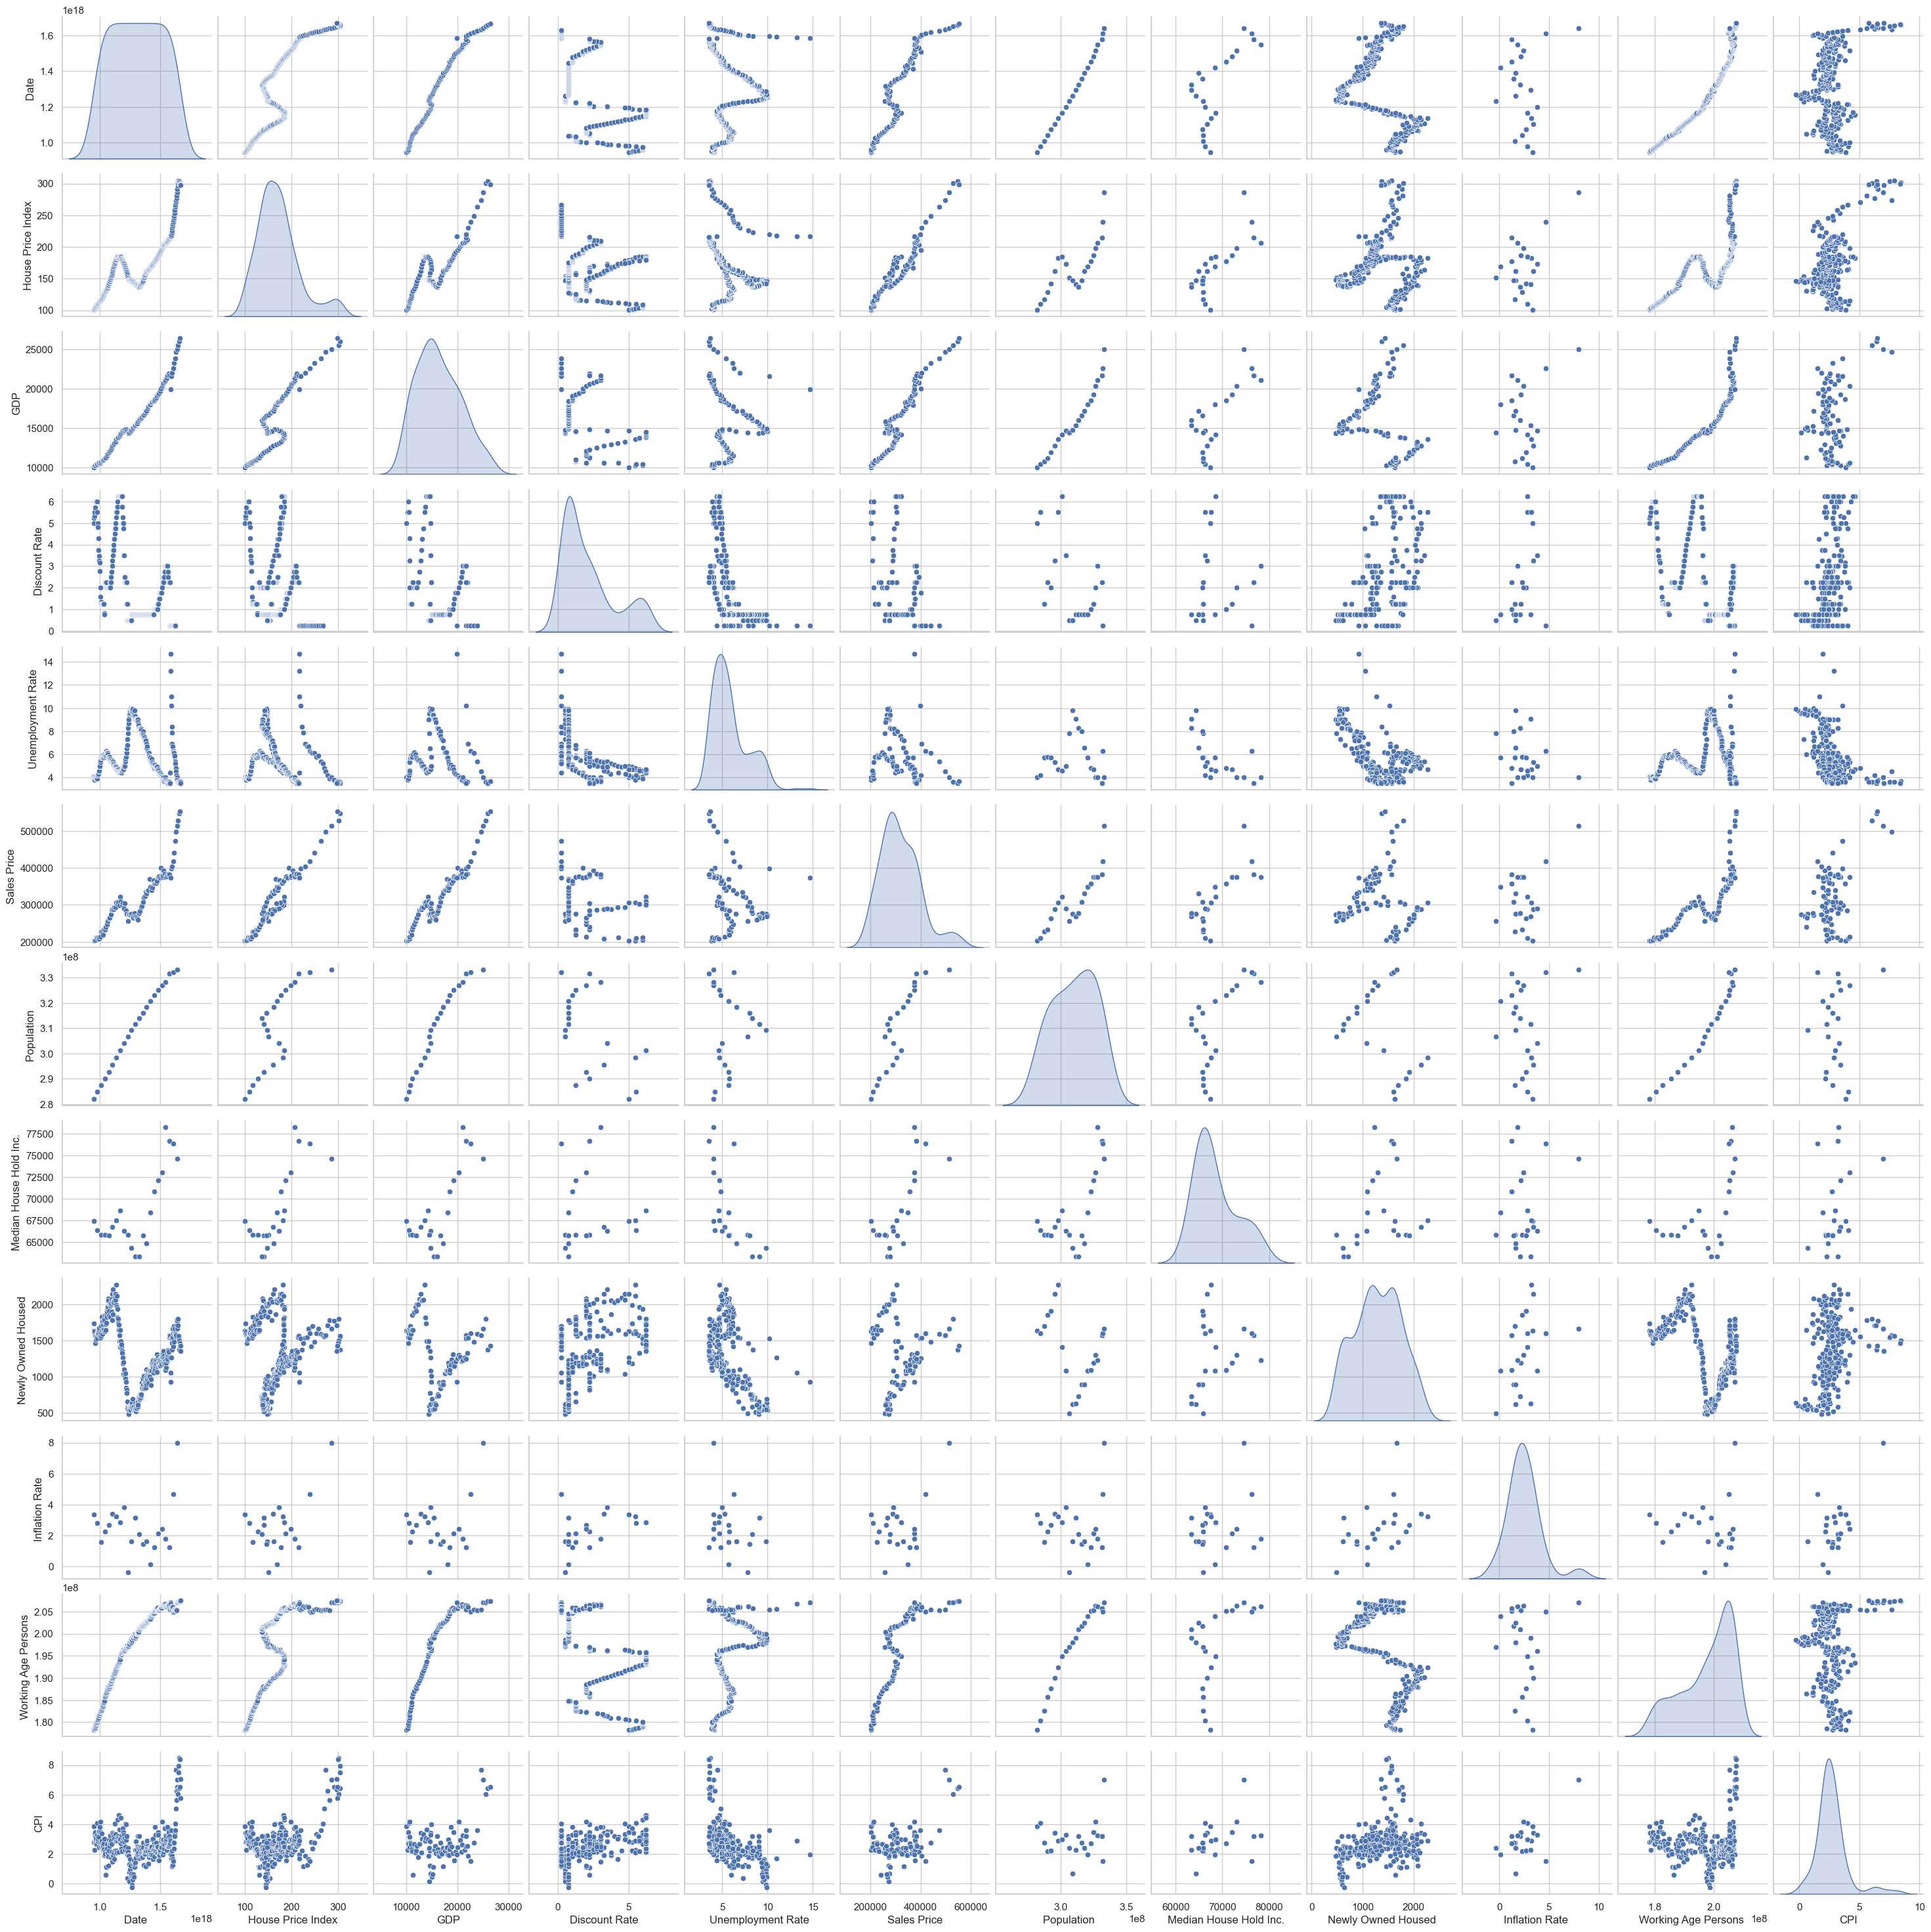

In [12]:
sns.set(style="whitegrid")
sns.pairplot(df, diag_kind="kde")
plt.show()

### <span Style = 'color:Green'> Handling Missing Values </span>

### <span style = 'color:Blue'> For Filling missing Values i will be filling with all the 3 approaches testing which gives good accuracy-
1. Missing all Values by Interpolation ( Linear Method)
2. Missing all values by Last Value Available 
3. Filling Continuous variables with linear interpolation, Categorical Categorical variables
    
Note: 
### Best performed model when missing values was handled by Linear Interpolation taken forward those values 

### <span Style = "color:Green"> Features with missing values as GDP, Dicount Rate, Sales Price , Pupolation , House Hold Income and Infaltion Rates
GDP                       184 ,
Discount Rate              16 ,
Sales Price               184 ,
Population                253 ,
Median House Hold Inc.    253 , 
Inflation Rate            253 ,


## <span Style = 'color:Green'> Handling Missing Values by Linear Interpolate Technique  </span> 
Just to check which technique for handling missing values works best using 3 approaches

In [13]:
df_interpolated = df.interpolate(method='linear')
print("Original DataFrame:")
print(df)

print("\nDataFrame after Filling with Linear Interpolation:")
print(df_interpolated)

Original DataFrame:
                   Date   House Price Index        GDP  Discount Rate  \
0     946684800000000000            100.551  10002.179           5.00   
1     949363200000000000            101.339        NaN           5.24   
2     951868800000000000            102.127        NaN           5.34   
3     954547200000000000            102.922  10247.720           5.50   
4     957139200000000000            103.678        NaN           5.71   
..                   ...                ...        ...            ...   
271  1659312000000000000            301.473        NaN            NaN   
272  1661990400000000000            299.353        NaN            NaN   
273  1664582400000000000            298.873  26408.405            NaN   
274  1667260800000000000            298.269        NaN            NaN   
275  1669852800000000000            297.413        NaN            NaN   

     Unemployment Rate  Sales Price  Population   Median House Hold Inc.  \
0                  4.0     

In [14]:
df_interpolated.head(10)

,Date,House Price Index,GDP,Discount Rate,Unemployment Rate,Sales Price,Population,Median House Hold Inc.,Newly Owned Housed,Inflation Rate,Working Age Persons,CPI
0,946684800000000000,100.551,10002.179000,5.00,4.0,202900.000000,2.821624e+08,67470.0,1636,3.376857,1.782921e+08,3.851771
1,949363200000000000,101.339,10084.026000,5.24,4.1,202733.333333,2.823963e+08,67377.5,1737,3.330967,1.783433e+08,2.785584
2,951868800000000000,102.127,10165.873000,5.34,4.0,202566.666667,2.826302e+08,67285.0,1604,3.285076,1.784055e+08,3.416809
3,954547200000000000,102.922,10247.720000,5.50,3.8,202400.000000,2.828640e+08,67192.5,1626,3.239186,1.785807e+08,2.276901
4,957139200000000000,103.678,10271.201667,5.71,4.0,202966.666667,2.830979e+08,67100.0,1575,3.193295,1.787272e+08,2.853534
5,959817600000000000,104.424,10294.683333,6.00,4.0,203533.333333,2.833318e+08,67007.5,1559,3.147405,1.790565e+08,3.142535
6,962409600000000000,105.054,10318.165000,6.00,4.0,204100.000000,2.835657e+08,66915.0,1463,3.101514,1.793240e+08,3.436363
7,965088000000000000,105.768,10357.358000,6.00,4.1,206766.666667,2.837996e+08,66822.5,1541,3.055624,1.793947e+08,2.875701
8,967766400000000000,106.538,10396.551000,6.00,3.9,209433.333333,2.840334e+08,66730.0,1507,3.009733,1.795656e+08,3.068734
9,970358400000000000,107.382,10435.744000,6.00,3.9,212100.000000,2.842673e+08,66637.5,1549,2.963843,1.797542e+08,2.701073


## <span Style = 'color:Green'> Handling Missing Values by Forward filling  </span> 
For hit and trial method while model building 

In [15]:
df_last_value = df.fillna(method='pad')

print("Original DataFrame:")
print(df)

print("\nDataFrame after Forward Filling with Last Available Value:")
print(df_last_value)

Original DataFrame:
                   Date   House Price Index        GDP  Discount Rate  \
0     946684800000000000            100.551  10002.179           5.00   
1     949363200000000000            101.339        NaN           5.24   
2     951868800000000000            102.127        NaN           5.34   
3     954547200000000000            102.922  10247.720           5.50   
4     957139200000000000            103.678        NaN           5.71   
..                   ...                ...        ...            ...   
271  1659312000000000000            301.473        NaN            NaN   
272  1661990400000000000            299.353        NaN            NaN   
273  1664582400000000000            298.873  26408.405            NaN   
274  1667260800000000000            298.269        NaN            NaN   
275  1669852800000000000            297.413        NaN            NaN   

     Unemployment Rate  Sales Price  Population   Median House Hold Inc.  \
0                  4.0     

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2904\1346564734.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_last_value = df.fillna(method='pad')


## <span Style = 'color:Green'> Handling Outliers </span>

In [16]:
%matplotlib inline
from scipy import stats

In [17]:
## Storing my new Data frame in df
df = df_interpolated.copy()

In [18]:

features = [ 'House Price Index' , 'Discount Rate' , 'Unemployment Rate' , 'Sales Price' , 'Inflation Rate ' , 'CPI' ] 

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2904\3419595673.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], label="skew: " + str(np.round(df[col].skew(),2)))
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with p

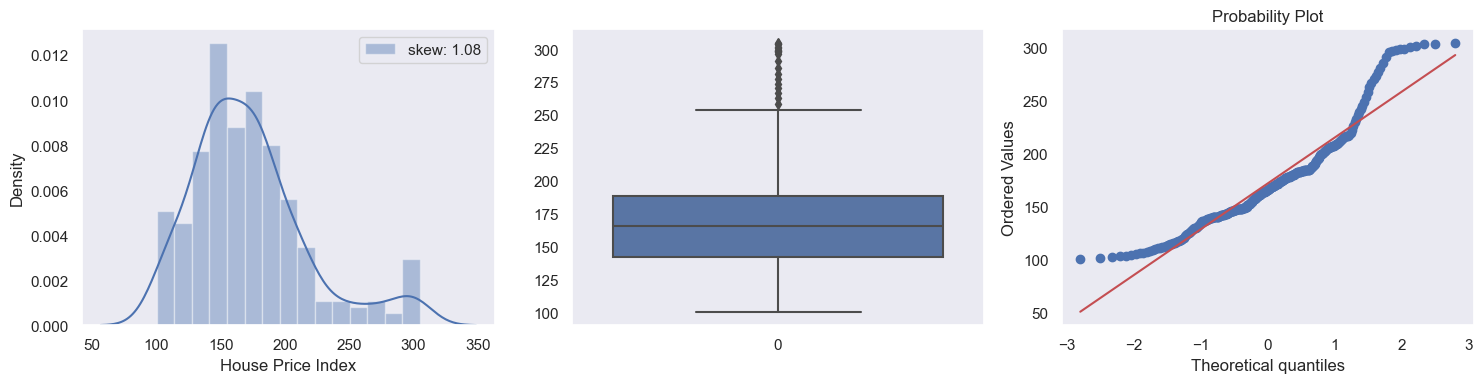

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2904\3419595673.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], label="skew: " + str(np.round(df[col].skew(),2)))
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with p

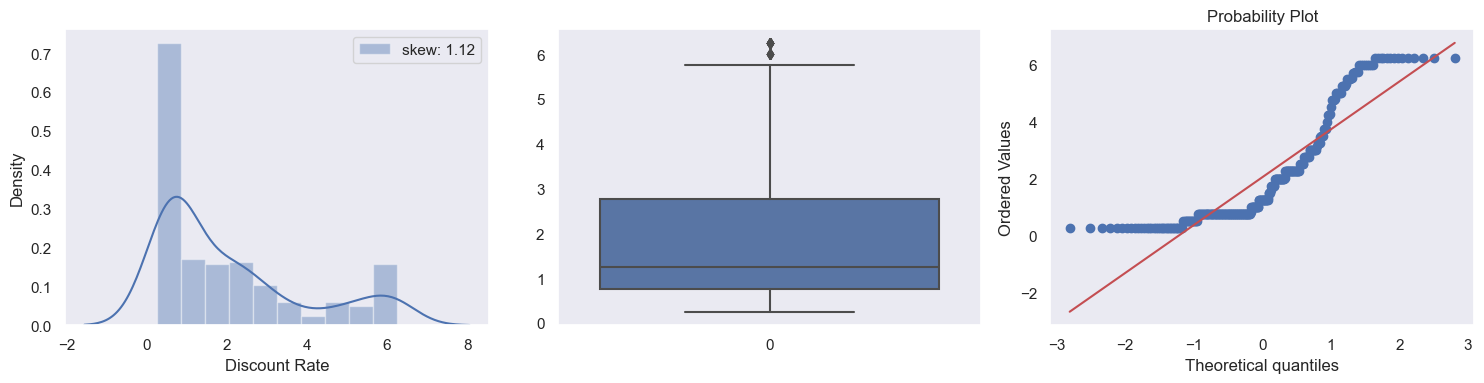

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2904\3419595673.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], label="skew: " + str(np.round(df[col].skew(),2)))
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with p

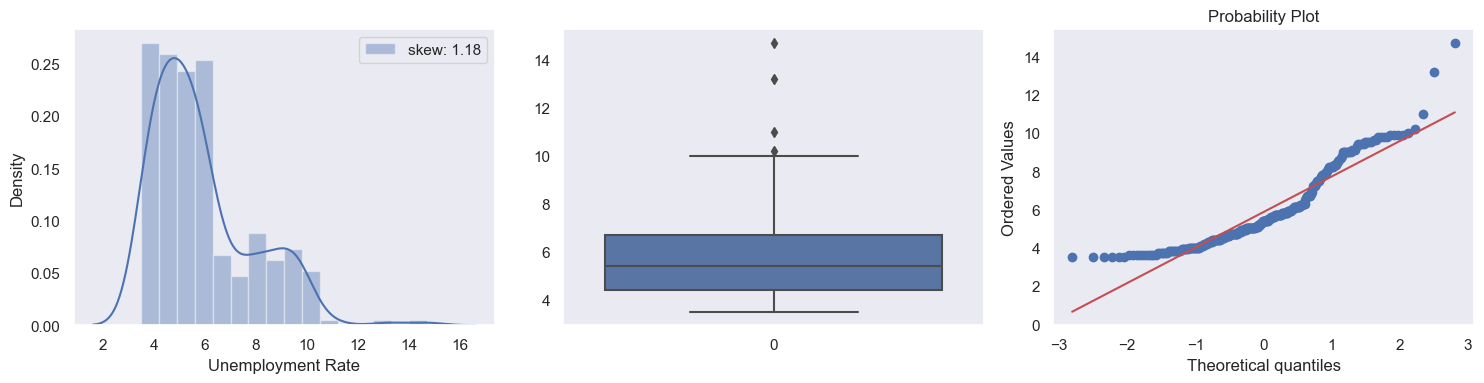

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2904\3419595673.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], label="skew: " + str(np.round(df[col].skew(),2)))
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with p

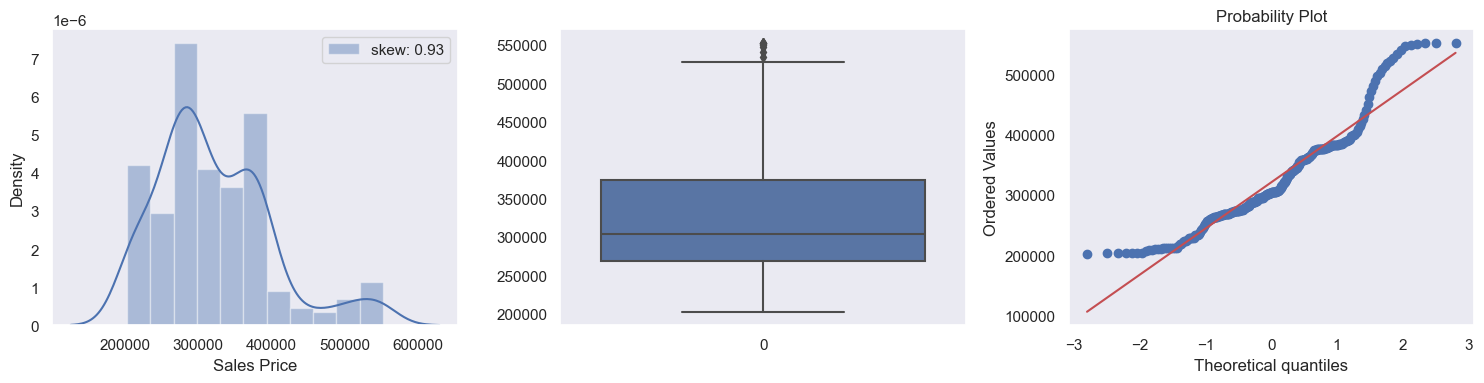

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2904\3419595673.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], label="skew: " + str(np.round(df[col].skew(),2)))
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with p

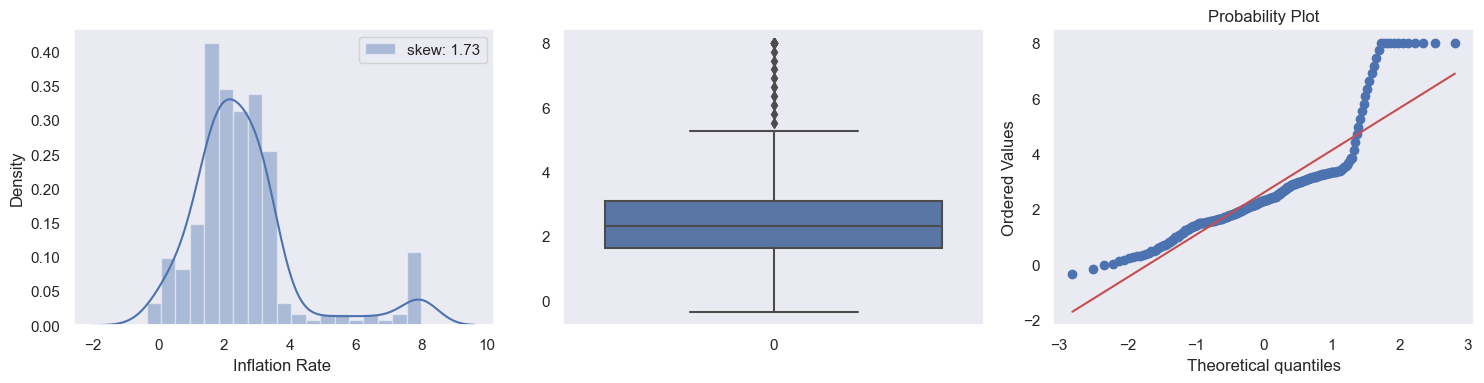

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2904\3419595673.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], label="skew: " + str(np.round(df[col].skew(),2)))
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with p

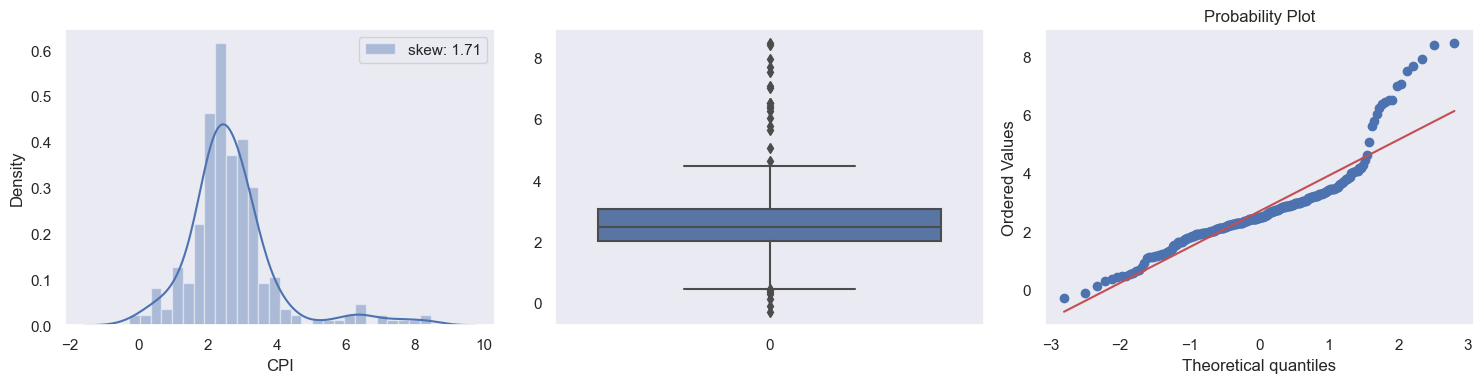

In [19]:
sns.set_style('dark')
for col in features:
    plt.figure(figsize=(15,4))
    plt.subplot(131)
    sns.distplot(df[col], label="skew: " + str(np.round(df[col].skew(),2)))
    plt.legend()
    
    plt.subplot(132)
    sns.boxplot(df[col])
    
    plt.subplot(133)
    stats.probplot(df[col], plot=plt)
    
    plt.tight_layout()
    plt.show()

### Take Away- From Above Boxplot for all the features -

#### <span style = 'color:Green'> We have 6 features which have outliers present- 
<span style = 'color:Blue'> House Price Index , Interest Rates , Unemployment Rate , Sales Price , Inflation Rate , CPI   </span> 

In [20]:
## Splitting Target and Input features

In [21]:
X = df_interpolated.drop(columns =['House Price Index'], axis =1)
y = df_interpolated['House Price Index']

#### Applying Train Test split for futher part of Preprocessing only on Training data ,leaving Test data as it is

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.head(2)

### <span style = 'color:Green'> Capping using Percentile method</span> 

In [23]:
X_train_cap = X_train.copy()

In [24]:
def percentile_capping(df, cols, from_low_end, from_high_end):
    
    for col in cols:
        
#         lower_bound = df[col].quantile(from_low_end)
#         upper_bound = df[col].quantile(1-from_high_end)
        
#         df[col] = np.where(df[col]>upper_bound, upper_bound,
#                  np.where(df[col]<lower_bound, lower_bound, df[col]))

        stats.mstats.winsorize(a=df[col], limits=(from_low_end, from_high_end), inplace=True)

In [25]:
features = ['Discount Rate','Unemployment Rate','Sales Price','Inflation Rate ','CPI'] 

In [26]:
# fourth argument of 0.01 from right end is equivalent to saying
# 1-0.01 = 0.99 quantile from the left end
percentile_capping(X_train_cap, features, 0.01, 0.01)

In [27]:
X_train_cap.describe()

,Date,GDP,Discount Rate,Unemployment Rate,Sales Price,Population,Median House Hold Inc.,Newly Owned Housed,Inflation Rate,Working Age Persons,CPI
count,2.200000e+02,220.000000,220.000000,220.000000,220.000000,2.200000e+02,220.000000,220.00000,220.000000,2.200000e+02,220.000000
mean,1.312019e+18,16540.322106,2.029636,5.800909,323420.000000,3.114319e+08,68886.659091,1301.10000,2.626101,1.978394e+08,2.700152
std,2.112886e+17,4271.449138,1.832934,1.859886,80101.123898,1.574673e+07,4359.462687,440.09536,1.714642,8.525767e+06,1.306126
min,9.466848e+17,10002.179000,0.250000,3.500000,202733.333333,2.821624e+08,63350.000000,478.00000,-0.005992,1.782921e+08,0.363484
25%,1.130134e+18,13392.943000,0.750000,4.400000,270741.666667,2.978430e+08,65836.250000,1001.75000,1.618491,1.918634e+08,1.996358
50%,1.308182e+18,15632.656500,1.250000,5.400000,304183.333333,3.126350e+08,67017.083333,1272.00000,2.337737,2.000340e+08,2.482725
75%,1.497593e+18,19657.814750,2.750000,6.700000,375541.666667,3.259087e+08,72520.833333,1626.75000,3.149114,2.053783e+08,3.028646
max,1.669853e+18,26408.405000,6.250000,11.000000,552600.000000,3.332876e+08,78250.000000,2273.00000,8.002800,2.075245e+08,7.924919


In [28]:
df.describe()

,Date,House Price Index,GDP,Discount Rate,Unemployment Rate,Sales Price,Population,Median House Hold Inc.,Newly Owned Housed,Inflation Rate,Working Age Persons,CPI
count,2.760000e+02,276.000000,276.000000,276.000000,276.000000,276.000000,2.760000e+02,276.000000,276.000000,276.000000,2.760000e+02,276.000000
mean,1.308256e+18,171.885768,16448.794946,2.042717,5.857971,320894.202899,3.111853e+08,68756.467391,1298.217391,2.585399,1.977138e+08,2.682623
std,2.099057e+17,44.739141,4228.820174,1.848204,1.959418,78892.539306,1.570236e+07,4362.208449,449.135100,1.680759,8.566747e+06,1.324773
min,9.466848e+17,100.551000,10002.179000,0.250000,3.500000,202400.000000,2.821624e+08,63350.000000,478.000000,-0.355546,1.782921e+08,-0.286064
25%,1.127477e+18,142.144750,13309.073833,0.750000,4.400000,268058.333333,2.976044e+08,65807.916667,972.250000,1.614246,1.916010e+08,2.016839
50%,1.308182e+18,165.858500,15632.656500,1.250000,5.400000,303833.333333,3.126350e+08,66909.166667,1272.000000,2.295185,2.000340e+08,2.472167
75%,1.488996e+18,188.176000,19399.003250,2.755000,6.700000,374525.000000,3.254439e+08,72266.250000,1633.750000,3.099838,2.053723e+08,3.057631
max,1.669853e+18,304.724000,26408.405000,6.250000,14.700000,552600.000000,3.332876e+08,78250.000000,2273.000000,8.002800,2.075245e+08,8.463917


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2904\558688678.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_interpolated[col], label="skew: " + str(np.round(df_interpolated[col].skew(),2)))
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before op

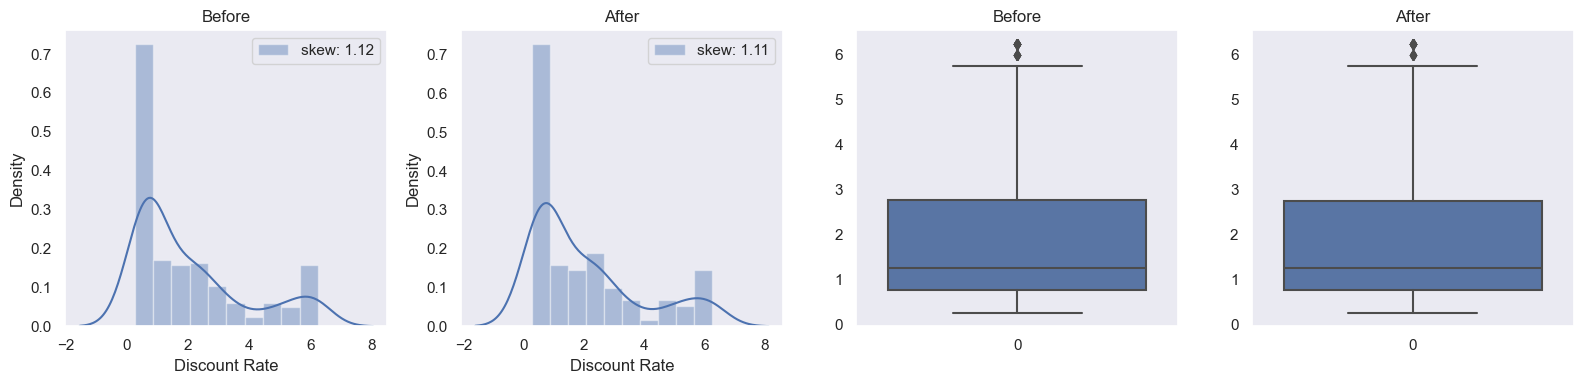

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2904\558688678.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_interpolated[col], label="skew: " + str(np.round(df_interpolated[col].skew(),2)))
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before op

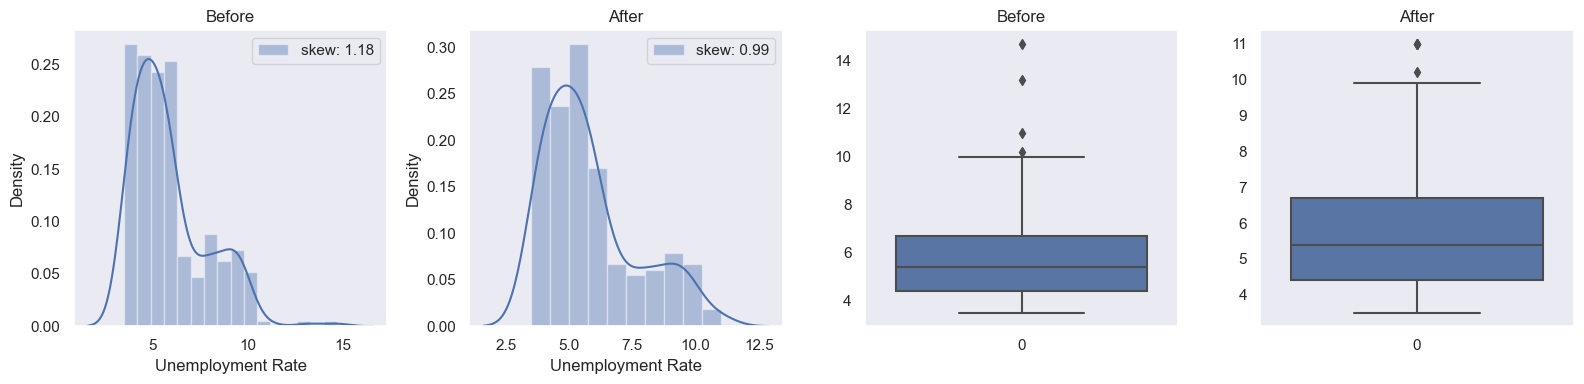

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2904\558688678.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_interpolated[col], label="skew: " + str(np.round(df_interpolated[col].skew(),2)))
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before op

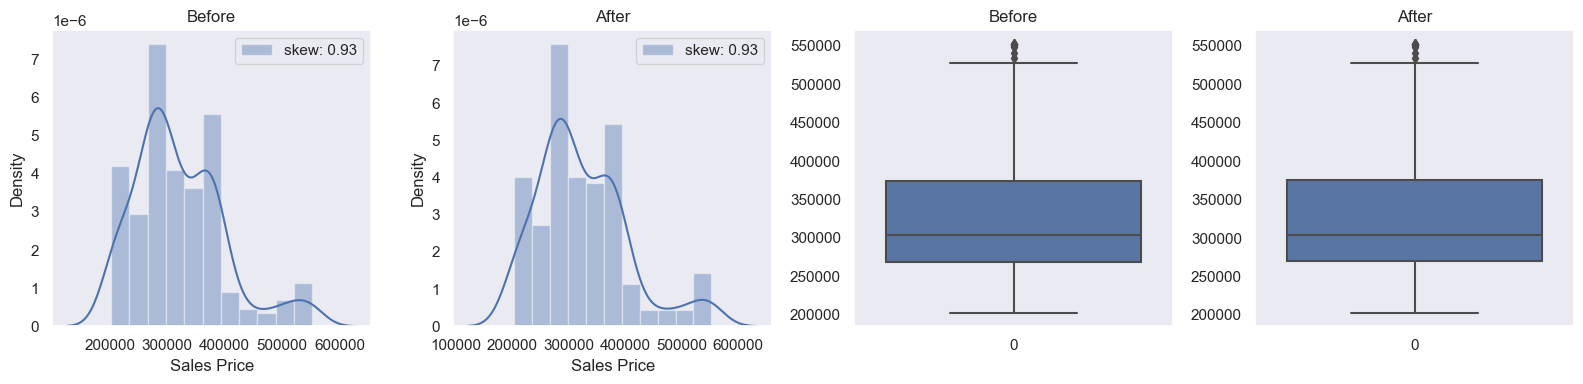

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2904\558688678.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_interpolated[col], label="skew: " + str(np.round(df_interpolated[col].skew(),2)))
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before op

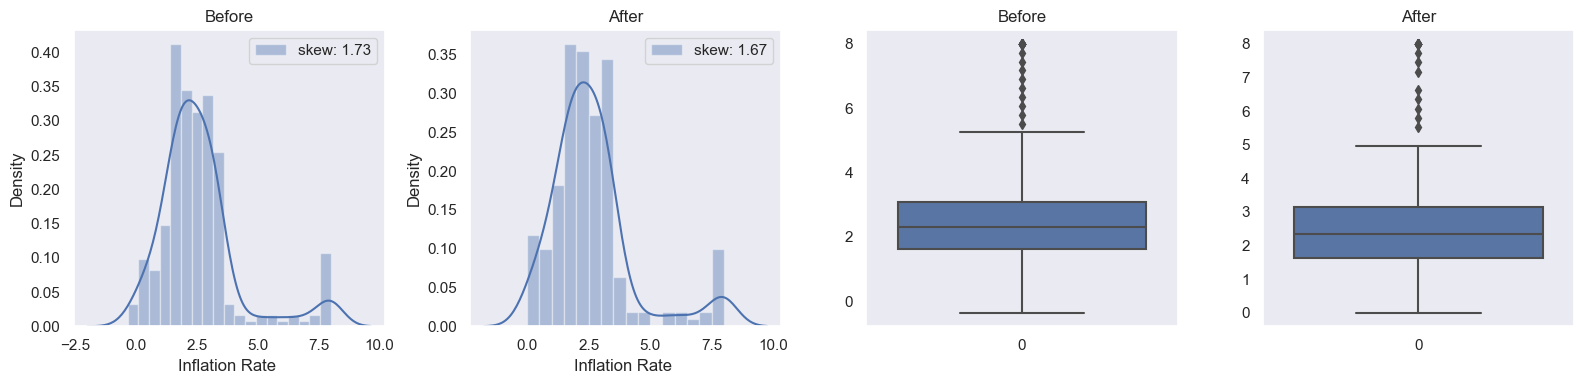

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2904\558688678.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_interpolated[col], label="skew: " + str(np.round(df_interpolated[col].skew(),2)))
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before op

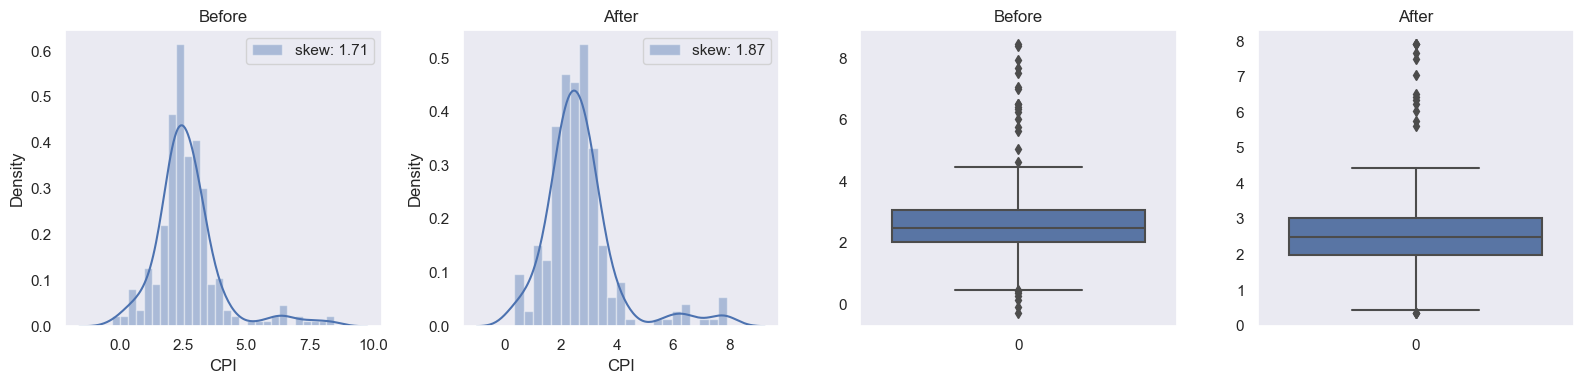

In [29]:
for col in features:
    plt.figure(figsize=(16,4))
    
    plt.subplot(141)
    sns.distplot(df_interpolated[col], label="skew: " + str(np.round(df_interpolated[col].skew(),2)))
    plt.title('Before')
    plt.legend()
    
    plt.subplot(142)
    sns.distplot(X_train_cap[col], label="skew: " + str(np.round(X_train_cap[col].skew(),2)))
    plt.title('After')
    plt.legend()
    
    plt.subplot(143)
    sns.boxplot(df_interpolated[col])
    plt.title('Before')
    
    plt.subplot(144)
    sns.boxplot(X_train_cap[col])
    plt.title('After')
    plt.tight_layout()
    plt.show()

## <span Style = 'color:Green'> Appying Standard Scaler for Features scaling </span> 

In [30]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train_cap)
X_test_normalized = scaler.transform(X_test)

In [31]:
## Storing in dataframe 
X_train_normalized = pd.DataFrame(X_train_normalized, columns = X_train.columns)
X_test_normalized = pd.DataFrame(X_test_normalized, columns = X_test.columns)

In [32]:
X_train_normalized.head()

,Date,GDP,Discount Rate,Unemployment Rate,Sales Price,Population,Median House Hold Inc.,Newly Owned Housed,Inflation Rate,Working Age Persons,CPI
0,1.485137,1.710256,-0.973136,-0.216047,1.871648,1.351144,1.510122,0.664778,2.176968,0.882246,0.675970
1,1.160535,1.160942,0.530612,-1.132166,0.691701,1.143067,2.030866,0.013437,-0.588497,1.012365,-0.108673
2,-1.321528,-1.285602,-0.426319,-0.054379,-1.137654,-1.396777,-0.698156,0.790036,-0.308067,-1.561788,-0.296396
3,0.226072,0.031607,-0.699728,1.023408,-0.146232,0.306917,-0.739539,-0.772272,-0.671144,0.474964,-0.190776
4,0.112953,-0.069392,-0.699728,1.292854,-0.460300,0.201976,-1.089768,-1.350736,-0.443238,0.431796,-0.742875


## <span Style = 'color:Green'> Appying MinMax Scaler for Features scaling </span>
(Just for hit and trial)

In [33]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1)) 

In [34]:
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train_cap)
X_test_scaled = scaler.transform(X_test)

In [35]:
## Storing in dataframe 
X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = X_test.columns)

In [36]:
X_train_scaled.head()

,Date,GDP,Discount Rate,Unemployment Rate,Sales Price,Population,Median House Hold Inc.,Newly Owned Housed,Inflation Rate,Working Age Persons,CPI
0,0.938112,0.842777,0.000000,0.169643,0.772701,0.987716,0.812416,0.621170,0.802297,0.925411,0.441956
1,0.843489,0.700086,0.458333,0.017857,0.503427,0.923774,0.964430,0.461838,0.236277,0.963275,0.325098
2,0.119952,0.064564,0.166667,0.196429,0.085951,0.143273,0.167785,0.651811,0.293674,0.214218,0.297140
3,0.571087,0.406726,0.083333,0.375000,0.312203,0.666823,0.155705,0.269638,0.219361,0.806896,0.312870
4,0.538112,0.380490,0.083333,0.419643,0.240529,0.634574,0.053468,0.128134,0.266007,0.794334,0.230645


## <span Style = 'color:Green'>Model Building </span>


X_train_normalized = pd.DataFrame(X_train_normalized, columns = X_train.columns)
X_test_normalized = pd.DataFrame(X_test_normalized, columns = X_test.columns)

In [44]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge,ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

models = {}
models["Linear Regression"] = LinearRegression()
models["Lasso Regression"] = Lasso()
models["Ridge Regression"] = Ridge()
models["Random Forest Regression"] = RandomForestRegressor()
models["Gradient Boosting Regression"] = GradientBoostingRegressor()
models["Elastic Net"] = ElasticNet(alpha=0.5, l1_ratio=0.9)


for name, model in models.items():
    model.fit(X_train_normalized, y_train)

# Evaluating and compare model performance
for name, model in models.items():
    y_pred = model.predict(X_test_normalized)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{name}: Mean Squared Error: {mse:.3f}, R^2: {r2:.3f}")



Linear Regression: Mean Squared Error: 15.303, R^2: 0.991
Lasso Regression: Mean Squared Error: 77.222, R^2: 0.956
Ridge Regression: Mean Squared Error: 32.668, R^2: 0.981
Random Forest Regression: Mean Squared Error: 2.378, R^2: 0.999
Gradient Boosting Regression: Mean Squared Error: 3.299, R^2: 0.998
Elastic Net: Mean Squared Error: 81.232, R^2: 0.954


In [56]:
## Saved my best Model in a variable 

best_model = models["Random Forest Regression"]

In [45]:
for name, model in models.items():
    model.fit(X_train_scaled, y_train)

# Evaluate and compare model performance
for name, model in models.items():
    y_pred = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{name}: Mean Squared Error: {mse:.3f}, R^2: {r2:.3f}")

Linear Regression: Mean Squared Error: 15.303, R^2: 0.991
Lasso Regression: Mean Squared Error: 108.347, R^2: 0.938
Ridge Regression: Mean Squared Error: 81.000, R^2: 0.954
Random Forest Regression: Mean Squared Error: 1.851, R^2: 0.999
Gradient Boosting Regression: Mean Squared Error: 3.778, R^2: 0.998
Elastic Net: Mean Squared Error: 202.458, R^2: 0.884


### Validating my Model Accuracy using GridSearchCV

In [46]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grids for each model
param_grids = {
    "Linear Regression": {},
    "Lasso Regression": {"alpha": [0.01, 0.1, 1.0, 10.0]},
    "Ridge Regression": {"alpha": [0.01, 0.1, 1.0, 10.0]},
    "Elastic Net": {"alpha": [0.01, 0.1, 1.0, 10.0], "l1_ratio": [0.1, 0.5, 0.9]}
}

# Perform GridSearchCV
grid_search_models = {}

for name, model in models.items():
    if name in param_grids:
        grid_search = GridSearchCV(model, param_grids[name], scoring='neg_mean_squared_error', cv=5)
        grid_search.fit(X_train_normalized, y_train)
        grid_search_models[name] = grid_search
    else:
        # For models without hyperparameters, use the original model
        grid_search_models[name] = model

# Evaluating and compare model performance
for name, grid_search in grid_search_models.items():
    if name in param_grids:
        best_model = grid_search.best_estimator_
        best_params = grid_search.best_params_
        print(f"{name}: Best params: {best_params}")

    y_pred = grid_search.predict(X_test_normalized)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{name}: Mean Squared Error: {mse:.3f}, R^2: {r2:.3f}")

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.323e+03, tolerance: 3.539e+01
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.228e+03, tolerance: 3.807e+01
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.499e+03, toleranc

Linear Regression: Best params: {}
Linear Regression: Mean Squared Error: 15.303, R^2: 0.991
Lasso Regression: Best params: {'alpha': 0.01}
Lasso Regression: Mean Squared Error: 20.339, R^2: 0.988
Ridge Regression: Best params: {'alpha': 0.01}
Ridge Regression: Mean Squared Error: 16.030, R^2: 0.991
Random Forest Regression: Mean Squared Error: 1423.669, R^2: 0.187
Gradient Boosting Regression: Mean Squared Error: 1218.664, R^2: 0.304
Elastic Net: Best params: {'alpha': 0.01, 'l1_ratio': 0.9}
Elastic Net: Mean Squared Error: 24.767, R^2: 0.986


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.278e+03, tolerance: 4.497e+01
  model = cd_fast.enet_coordinate_descent(


## <span Style = 'color:RED'>Hit And Trail With Different models and Different Preprocessing Techniques </span>

### <span Style = 'color:Green'> Without Applying Feature Scaling </span>

### 1. Results with Handling  Missing values with Linear Interpolation  
Linear Regression: Mean Squared Error: 55.008, R^2: 0.969

Lasso Regression: Mean Squared Error: 22.988, R^2: 0.987

Ridge Regression: Mean Squared Error: 14.921, R^2: 0.991

Random Forest Regression: Mean Squared Error: 2.321, R^2: 0.999

Gradient Boosting Regression: Mean Squared Error: 4.058, R^2: 0.998

### 2. Results with Handling  Missing values with ffill ( forward filling ) and Linear interploated Techniques 
Linear Regression: Mean Squared Error: 57.347, R^2: 0.967

Lasso Regression: Mean Squared Error: 24.050, R^2: 0.986

Ridge Regression: Mean Squared Error: 15.991, R^2: 0.991

Random Forest Regression: Mean Squared Error: 2.653, R^2: 0.998

Gradient Boosting Regression: Mean Squared Error: 2.152, R^2: 0.

### 3. Results with ffill technique for missing values (Linear Technique for missing values )

Linear Regression: Mean Squared Error: 76.551, R^2: 0.956

Lasso Regression: Mean Squared Error: 35.126, R^2: 0.980

Ridge Regression: Mean Squared Error: 30.094, R^2: 0.983

Random Forest Regression: Mean Squared Error: 4.258, R^2: 0.998

Gradient Boosting Regression: Mean Squared Error: 3.884, R^2: 0.998


### <span Style = 'color:Green'> Applying Standard Scaling For Feature Scaling </span>
### 1. Results with Handling  Missing values with Linear Interpolation  

Linear Regression: Mean Squared Error: 14.923, R^2: 0.991

Lasso Regression: Mean Squared Error: 76.317, R^2: 0.956

Ridge Regression: Mean Squared Error: 34.142, R^2: 0.981

Random Forest Regression: Mean Squared Error: 2.172, R^2: 0.999

Gradient Boosting Regression: Mean Squared Error: 4.177, R^2: 0.998

### <span Style = 'color:Green'> Applying MinMax Scaler For Feature Scaling </span>
### Results with Handling  Missing values with Linear Interpolation  

Linear Regression: Mean Squared Error: 14.923, R^2: 0.991

Lasso Regression: Mean Squared Error: 108.496, R^2: 0.938

Ridge Regression: Mean Squared Error: 80.990, R^2: 0.954

Random Forest Regression: Mean Squared Error: 3.130, R^2: 0.998

Gradient Boosting Regression: Mean Squared Error: 4.440, R^2: 0.997

## <span Style = 'color:Green'> Results while - Validating my Model Accuracy using GridSearchCV
### Results with Handling  Missing values with Linear Interpolation  

Linear Regression: Best params: {}

Linear Regression: Mean Squared Error: 14.923, R^2: 0.991

Lasso Regression: Best params: {'alpha': 0.01}

Lasso Regression: Mean Squared Error: 20.589, R^2: 0.988

Ridge Regression: Best params: {'alpha': 0.01}

Ridge Regression: Mean Squared Error: 15.529, R^2: 0.991

Random Forest Regression: Mean Squared Error: 2.763, R^2: 0.998

Gradient Boosting Regression: Mean Squared Error: 4.973, R^2: 0.997

Elastic Net: Best params: {'alpha': 0.01, 'l1_ratio': 0.9}

Elastic Net: Mean Squared Error: 25.170, R^2: 0.986

## Conclusion - Best Model with Accuracy


### <Span style ='color:Red'> Random Forest Regression.
#### <Span style ='color:Green'> When Applying Standard Scaling For Feature Scaling and Handling  Missing values with Linear Interpolation  
#### With Mean Squared Error: 2.763, R^2: 0.998


In [50]:
pip install --upgrade scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [51]:
import sklearn

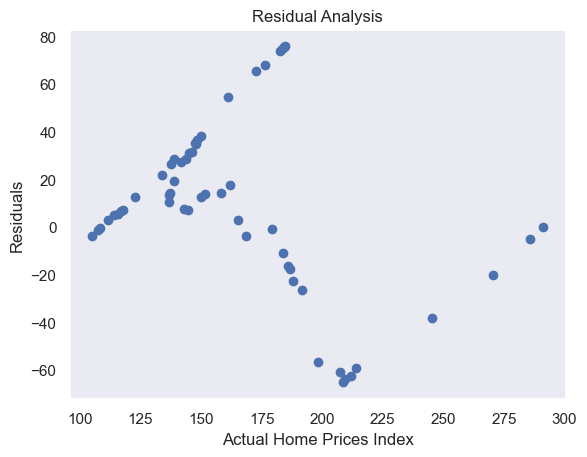

In [58]:
residuals = y_test - best_model.predict(X_test_normalized)

# Creating a scatter plot of residuals
plt.scatter(y_test, residuals)
plt.xlabel("Actual Home Prices Index")
plt.ylabel("Residuals")
plt.title("Residual Analysis")
plt.show()


### <span style = 'color:green'> Accessing top 10 influencing features 
### Using Mean Decrease Impurity:

In [57]:
feature_importance =[ 0.275009, 0.217389, 0.178825, 0.165177, 0.086612, 0.031730, 0.020203, 0.011935, 0.007298, 0.005061]
feature_names =['Date', 'GDP', 'Discount Rate', 'Unemployment Rate', 'Sales Price', 'Population', 'Median House Hold Inc.', 'Newly Owned Housed', 'Inflation Rate', 'Working Age Persons', 'CPI']
feature_importance = best_model.feature_importances_

feature_importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": feature_importance
})

feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)

print("Top 10 Important Features:")
print(feature_importance_df.head(10))

Top 10 Important Features:
                   Feature  Importance
6   Median House Hold Inc.    0.243002
0                     Date    0.225184
5               Population    0.177490
4              Sales Price    0.157254
1                      GDP    0.128028
3        Unemployment Rate    0.031810
8           Inflation Rate    0.022698
9      Working Age Persons    0.010857
10                     CPI    0.001954
2            Discount Rate    0.001133


## <span style='color:green'>Results
### Top 10 Most Important Features:
###  <span style='color:blue'>Feature  Importance
    

1                      GDP     0.086612    

2            Discount Rate     0.007298
 
3        Unemployment Rate     0.031730

4              Sales Price     0.165177

5               Population     0.217389

6   Median House Hold Inc.     0.275009

8           Inflation Rate     0.020203

9      Working Age Persons     0.011935

10                     CPI     0.005061

In [59]:
feature_importance =[ 0.275009, 0.217389, 0.178825, 0.165177, 0.086612, 0.031730, 0.020203, 0.011935, 0.007298, 0.005061]
feature_names =['Date', 'GDP', 'Discount Rate', 'Unemployment Rate', 'Sales Price', 'Population', 'Median House Hold Inc.', 'Newly Owned Housed', 'Inflation Rate', 'Working Age Persons', 'CPI']

### Checking the AVG. Importance of Each Group 

In [60]:
feature_importances_rf = best_model.feature_importances_

feature_importance_dict_rf = dict(zip(X_train.columns, feature_importances_rf))

group1_features = ['GDP', 'Discount Rate', 'Unemployment Rate']
group2_features = ['Population ', 'Median House Hold Inc.', 'Newly Owned Housed']

group1_importance_scores = [feature_importance_dict_rf[feature] for feature in group1_features]
group2_importance_scores = [feature_importance_dict_rf[feature] for feature in group2_features]

group1_importance = np.mean(group1_importance_scores)
group2_importance = np.mean(group2_importance_scores)

print(f"Group 1 (Economic Indicators) Importance: {group1_importance:.3f}")
print(f"Group 2 (Demographic Factors) Importance: {group2_importance:.3f}")


Group 1 (Economic Indicators) Importance: 0.054
Group 2 (Demographic Factors) Importance: 0.140


### Demographic factors influence is more than the economic Indicators- 
Group 1 (Economic Indicators) Importance: 0.042

Group 2 (Demographic Factors) Importance: 0.164

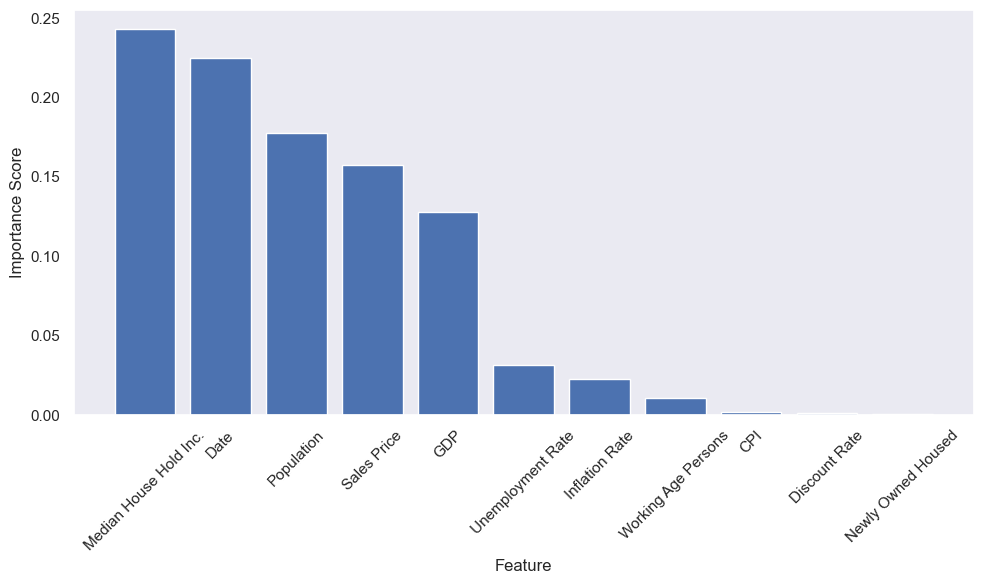

In [61]:
# visualizing feature importance with a bar chart

plt.figure(figsize=(10, 6))
plt.bar(feature_importance_df["Feature"], feature_importance_df["Importance"])
plt.xlabel("Feature")
plt.ylabel("Importance Score")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()